# COMPARISON OF CLASSIFIERS

In this notebook, we're going to go compare various classfication models by implementing them on a classification problem.

## 1. Problem definition

* How well can we predict which pumps require repairs and which are not functional by using the given data set?

## 2. Data

There are 2 main datasets:
* The training data is downloaded from: https://drive.google.com/file/d/1-E-EfSZcREnhyMe23tluDmzNnS2pWSE_/view?usp=sharing 
* The testing data is downloaded from: https://drive.google.com/file/d/1-498FRSmoGj1AqpuPIHU5P8tIwuHEzN1/view?usp=sharing

## 3. Evaluation

The evaluation metric used is specific to the model used in testing the data.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
# Import training and validation sets
df = pd.read_csv("Train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   amount_tsh             44550 non-null  float64
 2   date_recorded          44550 non-null  object 
 3   funder                 41757 non-null  object 
 4   gps_height             44550 non-null  int64  
 5   installer              41743 non-null  object 
 6   longitude              44550 non-null  float64
 7   latitude               44550 non-null  float64
 8   wpt_name               44550 non-null  object 
 9   num_private            44550 non-null  int64  
 10  basin                  44550 non-null  object 
 11  subvillage             44263 non-null  object 
 12  region                 44550 non-null  object 
 13  region_code            44550 non-null  int64  
 14  district_code          44550 non-null  int64  
 15  lg

In [6]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2793
gps_height                   0
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [7]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [8]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


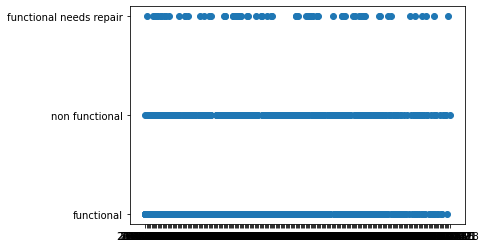

In [9]:
plt.scatter(df["date_recorded"][:1000], df["status_group"][:1000])

In [10]:
df["date_recorded"][:1000]

0      2013-03-20
1      2011-02-21
2      2013-01-04
3      2011-04-03
4      2013-03-08
          ...    
995    2011-03-08
996    2011-04-01
997    2013-02-19
998    2011-02-20
999    2011-03-30
Name: date_recorded, Length: 1000, dtype: object

In [11]:
df["date_recorded"].dtype

dtype('O')

(array([24194.,     0.,     0.,     0.,     0., 17118.,     0.,     0.,
            0.,  3238.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

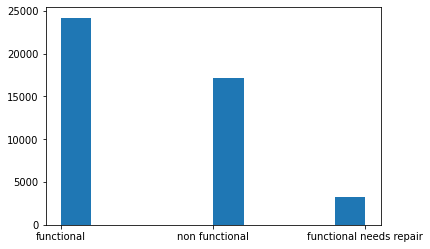

In [12]:
plt.hist(df["status_group"])

### Parsing dates

Reference: https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates  

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [13]:
# Import data again but this time parse dates
df = pd.read_csv("Train.csv",
                 parse_dates=["date_recorded"])
df_test = pd.read_csv("test.csv",
                 parse_dates=["date_recorded"])

In [14]:
df["date_recorded"].dtype

dtype('<M8[ns]')

In [15]:
df["date_recorded"][:1000]

0     2013-03-20
1     2011-02-21
2     2013-01-04
3     2011-04-03
4     2013-03-08
         ...    
995   2011-03-08
996   2011-04-01
997   2013-02-19
998   2011-02-20
999   2011-03-30
Name: date_recorded, Length: 1000, dtype: datetime64[ns]

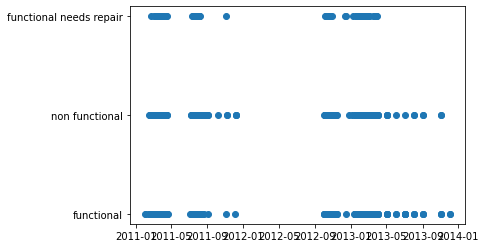

In [16]:
plt.scatter(df["date_recorded"][:1000], df["status_group"][:1000])

In [17]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [18]:
df.head().T

,0,1,2,3,4
id,7411,18014,26103,31140,12286
amount_tsh,7,0,0,0,300
date_recorded,2013-03-20 00:00:00,2011-02-21 00:00:00,2013-01-04 00:00:00,2011-04-03 00:00:00,2013-03-08 00:00:00
funder,Germany Republi,Cdtf,Government Of Tanzania,District Council,District Council
gps_height,1203,1409,1572,0,1283
installer,CES,CDTF,DWE,District Council,District Council
longitude,37.2287,34.6155,36.6588,33.628,37.6555
latitude,-3.2565,-9.9726,-3.32153,-8.8608,-3.66978
wpt_name,Kwa Abdalla,none,Kwa Loishiye,Mwanzechele,Kwa Kidaya
num_private,0,0,0,0,0


In [19]:
df["date_recorded"].head(20)

0    2013-03-20
1    2011-02-21
2    2013-01-04
3    2011-04-03
4    2013-03-08
5    2012-10-03
6    2011-03-28
7    2011-03-12
8    2013-01-18
9    2013-01-29
10   2011-04-02
11   2011-03-11
12   2011-08-02
13   2011-04-02
14   2011-07-23
15   2013-03-28
16   2013-02-11
17   2013-02-18
18   2011-07-14
19   2013-02-17
Name: date_recorded, dtype: datetime64[ns]

### Sort DataFrame by saledate

Reference: https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates

When working with time series data, it's a good idea to sort it by date.

In [20]:
# Sort DataFrame in date order
df.sort_values(by=["date_recorded"], inplace=True, ascending=True)
df["date_recorded"].head(20)

24841   2002-10-14
25718   2004-03-01
8314    2004-03-01
34400   2004-03-01
16971   2004-03-06
9426    2004-04-01
6398    2004-05-01
26682   2004-05-01
43007   2004-06-01
10172   2004-08-01
19581   2004-08-01
11905   2004-09-01
39440   2004-12-01
39470   2004-12-01
41606   2004-12-01
9855    2004-12-01
7992    2004-12-01
24290   2004-12-01
37452   2004-12-01
34279   2004-12-01
Name: date_recorded, dtype: datetime64[ns]

In [21]:
df["date_recorded"].tail(20)

14723   2013-12-03
24647   2013-12-03
4525    2013-12-03
28511   2013-12-03
14784   2013-12-03
11783   2013-12-03
5389    2013-12-03
39955   2013-12-03
5421    2013-12-03
37033   2013-12-03
31968   2013-12-03
4464    2013-12-03
28550   2013-12-03
15046   2013-12-03
2278    2013-12-03
38696   2013-12-03
4420    2013-12-03
33664   2013-12-03
40748   2013-12-03
18251   2013-12-03
Name: date_recorded, dtype: datetime64[ns]

In [22]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

### Add datetime parameters for `date_recorded` column

Reference: https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates

In [23]:
df_tmp["record_Year"] = df_tmp["date_recorded"].dt.year
df_tmp["record_Month"] = df_tmp["date_recorded"].dt.month
df_tmp["record_Day"] = df_tmp["date_recorded"].dt.day

In [24]:
df_tmp.head().T

,24841,25718,8314,34400,16971
id,14428,20534,5971,3358,15921
amount_tsh,0,50,0,0,0
date_recorded,2002-10-14 00:00:00,2004-03-01 00:00:00,2004-03-01 00:00:00,2004-03-01 00:00:00,2004-03-06 00:00:00
funder,Undp,Tasaf And Lga,Amref,Fw,Tasafu
gps_height,0,239,-27,362,301
installer,BESADA,TASAFcitizen and LGA,AMREF,FW,DWE
longitude,33.6881,39.2727,39.2831,38.605,38.5584
latitude,-3.74058,-11.019,-7.42285,-10.787,-5.14041
wpt_name,Shule,Juhudi,Kwa Ndevu,Marambo,Shuleni
num_private,0,0,0,0,0


In [25]:
# Now we've enriched our DataFrame with date time features, we can remove 'saledate'
df_tmp.drop("date_recorded", axis=1, inplace=True)

In [26]:
# Check the values of different columns
df_tmp.nunique()

id                       44550
amount_tsh                  85
funder                    1651
gps_height                2396
installer                 1854
longitude                43155
latitude                 43155
wpt_name                 28991
num_private                 59
basin                        9
subvillage               16617
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2080
population                 956
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2506
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

In [27]:
len(df_tmp)

44550

#### We can see that the features 'id' , 'latitude' , 'longitude', 'recorded_by' do not add any information over which our ML model can generalise. Hence, we drop those features. 

In [28]:
cols_to_drop = ['id' , 'latitude' , 'longitude', 'recorded_by']
df_tmp.drop(cols_to_drop , axis = 1 , inplace= True)

In [29]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 24841 to 18251
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   funder                 41757 non-null  object 
 2   gps_height             44550 non-null  int64  
 3   installer              41743 non-null  object 
 4   wpt_name               44550 non-null  object 
 5   num_private            44550 non-null  int64  
 6   basin                  44550 non-null  object 
 7   subvillage             44263 non-null  object 
 8   region                 44550 non-null  object 
 9   region_code            44550 non-null  int64  
 10  district_code          44550 non-null  int64  
 11  lga                    44550 non-null  object 
 12  ward                   44550 non-null  object 
 13  population             44550 non-null  int64  
 14  public_meeting         42059 non-null  object 
 15

In [30]:
df_tmp.isna().sum()

amount_tsh                   0
funder                    2793
gps_height                   0
installer                 2807
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_c

## Data Encoding

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [31]:
df_tmp.head().T

,24841,25718,8314,34400,16971
amount_tsh,0,50,0,0,0
funder,Undp,Tasaf And Lga,Amref,Fw,Tasafu
gps_height,0,239,-27,362,301
installer,BESADA,TASAFcitizen and LGA,AMREF,FW,DWE
wpt_name,Shule,Juhudi,Kwa Ndevu,Marambo,Shuleni
num_private,0,0,0,0,0
basin,Internal,Ruvuma / Southern Coast,Rufiji,Ruvuma / Southern Coast,Pangani
subvillage,Mwawe Ja,Mwanona,Gundani,Mijelejele,Kiwanjani
region,Shinyanga,Mtwara,Pwani,Mtwara,Tanga
region_code,17,90,6,90,4


In [32]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [33]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 24841 to 18251
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             44550 non-null  float64 
 1   funder                 41757 non-null  category
 2   gps_height             44550 non-null  int64   
 3   installer              41743 non-null  category
 4   wpt_name               44550 non-null  category
 5   num_private            44550 non-null  int64   
 6   basin                  44550 non-null  category
 7   subvillage             44263 non-null  category
 8   region                 44550 non-null  category
 9   region_code            44550 non-null  int64   
 10  district_code          44550 non-null  int64   
 11  lga                    44550 non-null  category
 12  ward                   44550 non-null  category
 13  population             44550 non-null  int64   
 14  public_meeting         42059 non-n

In [34]:
df_tmp["basin"].cat.categories

Index(['Internal', 'Lake Nyasa', 'Lake Rukwa', 'Lake Tanganyika',
       'Lake Victoria', 'Pangani', 'Rufiji', 'Ruvuma / Southern Coast',
       'Wami / Ruvu'],
      dtype='object')

In [35]:
df_tmp["basin"].cat.codes

24841    0
25718    7
8314     6
34400    7
16971    5
        ..
38696    5
4420     5
33664    5
40748    0
18251    0
Length: 44550, dtype: int8

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data

In [36]:
df_tmp.isna().sum()

amount_tsh                   0
funder                    2793
gps_height                   0
installer                 2807
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_c

## Data Imputing (Fill missing values) 

### Fill numerical missing values first

In [37]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

amount_tsh
gps_height
num_private
region_code
district_code
population
construction_year
record_Year
record_Month
record_Day


In [38]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [39]:
# Check for which numeric columns have null values
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

#### So all the null values are in the categorical column

### Filling and turning categorical variables into numbers

In [40]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

funder
installer
wpt_name
basin
subvillage
region
lga
ward
public_meeting
scheme_management
scheme_name
permit
extraction_type
extraction_type_group
extraction_type_class
management
management_group
payment
payment_type
water_quality
quality_group
quantity
quantity_group
source
source_type
source_class
waterpoint_type
waterpoint_type_group
status_group


In [41]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [42]:
# Same for test_data
# Turn categorical variables into numbers and fill missing
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_test[label] = pd.Categorical(content).codes+1

In [43]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 24841 to 18251
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   funder                 44550 non-null  int16  
 2   gps_height             44550 non-null  int64  
 3   installer              44550 non-null  int16  
 4   wpt_name               44550 non-null  int16  
 5   num_private            44550 non-null  int64  
 6   basin                  44550 non-null  int8   
 7   subvillage             44550 non-null  int16  
 8   region                 44550 non-null  int8   
 9   region_code            44550 non-null  int64  
 10  district_code          44550 non-null  int64  
 11  lga                    44550 non-null  int8   
 12  ward                   44550 non-null  int16  
 13  population             44550 non-null  int64  
 14  public_meeting         44550 non-null  int8   
 15

In [44]:
df_tmp.head().T

,24841,25718,8314,34400,16971
amount_tsh,0.0,50.0,0.0,0.0,0.0
funder,1505.0,1420.0,58.0,366.0,1424.0
gps_height,0.0,239.0,-27.0,362.0,301.0
installer,121.0,1500.0,37.0,452.0,357.0
wpt_name,26954.0,3485.0,15841.0,21477.0,27521.0
num_private,0.0,0.0,0.0,0.0,0.0
basin,1.0,8.0,7.0,8.0,6.0
subvillage,11940.0,11783.0,2023.0,9363.0,5941.0
region,18.0,13.0,15.0,13.0,21.0
region_code,17.0,90.0,6.0,90.0,4.0


In [45]:
df_tmp.isna().sum()

amount_tsh               0
funder                   0
gps_height               0
installer                0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
record_Year              0
r

In [46]:
df_test.isna().sum()

Unnamed: 0               0
id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
s

Obseravtions: Good! Now, the data is in the required format and we can proceed with further pre-processign of the data and it's visualisation

In [47]:
df_tmp.head()

,amount_tsh,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,record_Year,record_Month,record_Day
24841,0.0,1505,0,121,26954,0,1,11940,18,17,8,41,1988,0,1,4,0,1,0,4,2,1,4,3,7,7,7,3,4,4,6,4,2,7,6,1,2002,10,14
25718,50.0,1420,239,1500,3485,0,8,11783,13,90,33,89,887,317,2,8,1712,1,2009,4,2,1,8,5,5,6,7,3,2,2,9,7,1,3,2,1,2004,3,1
8314,0.0,58,-27,37,15841,0,7,2023,15,6,4,70,969,200,2,8,0,1,2007,16,12,2,8,5,1,3,7,3,4,4,8,6,1,5,4,3,2004,3,1
34400,0.0,366,362,452,21477,0,8,9363,13,90,33,58,1528,1,2,8,0,2,1980,10,7,4,8,5,7,7,7,3,1,1,8,6,1,7,6,3,2004,3,1
16971,0.0,1424,301,357,27521,0,6,5941,21,4,2,45,811,713,2,8,0,1,2009,10,7,4,8,5,1,3,7,3,1,1,8,6,1,7,6,3,2004,3,6


In [48]:
len(df_tmp)

44550

In [49]:
cols_to_drop = ['amount_tsh' , 'population' ,'num_private' , 'quantity_group' , 'source_type' , 'extraction_type_group', 'waterpoint_type_group']
df_tmp.drop(cols_to_drop , axis= 1 , inplace=True)


In [50]:
df_test.drop(cols_to_drop , axis= 1 , inplace=True)

In [51]:
df_tmp.head()

,funder,gps_height,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group,record_Year,record_Month,record_Day
24841,1505,0,121,26954,1,11940,18,17,8,41,1988,1,4,0,1,0,4,1,4,3,7,7,7,3,4,6,2,7,1,2002,10,14
25718,1420,239,1500,3485,8,11783,13,90,33,89,887,2,8,1712,1,2009,4,1,8,5,5,6,7,3,2,9,1,3,1,2004,3,1
8314,58,-27,37,15841,7,2023,15,6,4,70,969,2,8,0,1,2007,16,2,8,5,1,3,7,3,4,8,1,5,3,2004,3,1
34400,366,362,452,21477,8,9363,13,90,33,58,1528,2,8,0,2,1980,10,4,8,5,7,7,7,3,1,8,1,7,3,2004,3,1
16971,1424,301,357,27521,6,5941,21,4,2,45,811,2,8,0,1,2009,10,4,8,5,1,3,7,3,1,8,1,7,3,2004,3,6


#### For this problem, 'status_group' is the target variable and rest variables are the features. For moving further, we split the given data into train and test datasets.

## Train-Validation Splitting

In [52]:
## Separating the features and the target variables
X = df_tmp.drop('status_group', axis =1)
y = df_tmp['status_group']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2) # We keep 20 percent of the data for testing

## Data Pre-Processing


In [54]:
for col in X_train.columns.values:
    list_vals = pd.unique(X_train[col])
    print("This feature", col,"is of the type", str(X_train[col].dtypes),"and has", str(len(list_vals)), "unique values and", str(np.isnan(list_vals).sum()), "null values")

This feature funder is of the type int16 and has 1459 unique values and 0 null values
This feature gps_height is of the type int64 and has 2364 unique values and 0 null values
This feature installer is of the type int16 and has 1669 unique values and 0 null values
This feature wpt_name is of the type int16 and has 23722 unique values and 0 null values
This feature basin is of the type int8 and has 9 unique values and 0 null values
This feature subvillage is of the type int16 and has 14779 unique values and 0 null values
This feature region is of the type int8 and has 21 unique values and 0 null values
This feature region_code is of the type int64 and has 27 unique values and 0 null values
This feature district_code is of the type int64 and has 20 unique values and 0 null values
This feature lga is of the type int8 and has 125 unique values and 0 null values
This feature ward is of the type int16 and has 2066 unique values and 0 null values
This feature public_meeting is of the type int

In [55]:
## Check if any feature has low diversity
for col in X_train.columns.values:
    list_vals = pd.unique(X_train[col])
    if (len(list_vals)<10): # If the feature has less than 10 unique values, then print them
        print(col)

basin
public_meeting
permit
extraction_type_class
management_group
payment
payment_type
water_quality
quality_group
quantity
source_class
waterpoint_type
record_Year


#### Observations: 
#### 1) None of the features have null values.
#### 2) Some of the features have low diversity. However, at this point we continue with them.
#### Next: Plot the features to visualize the problem. 

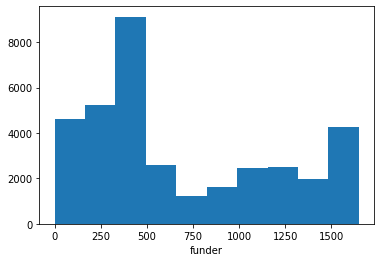

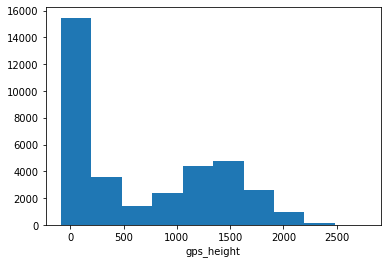

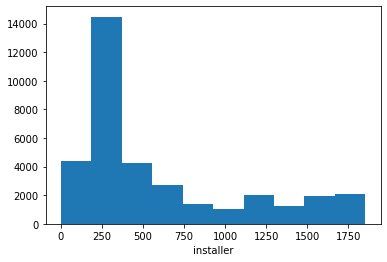

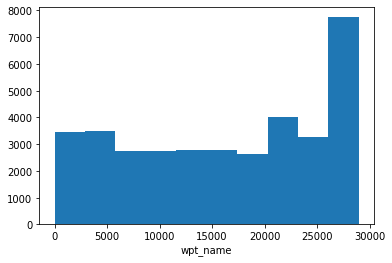

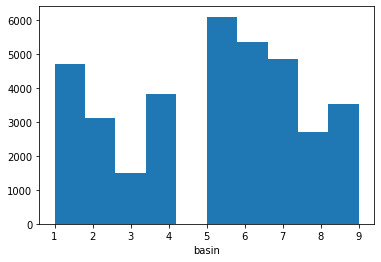

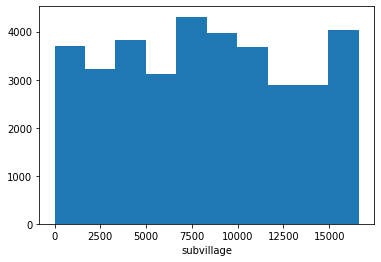

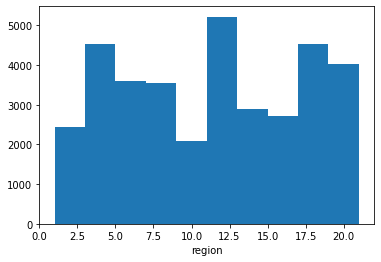

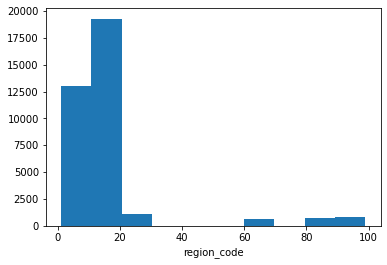

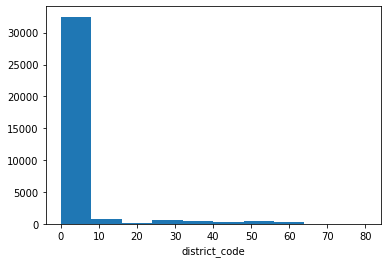

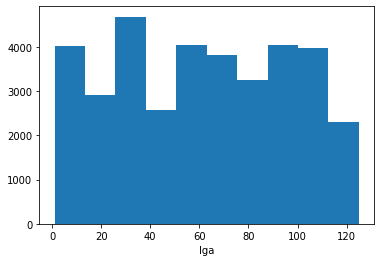

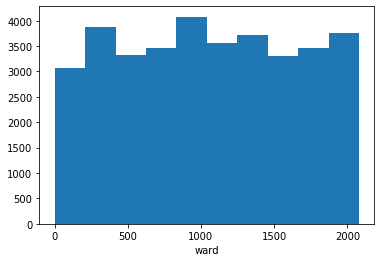

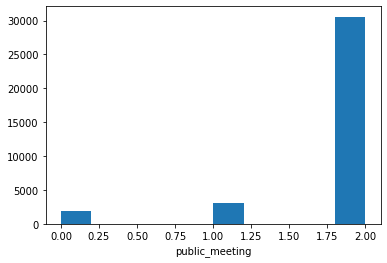

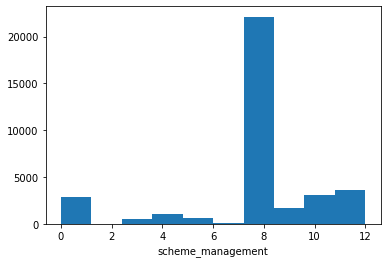

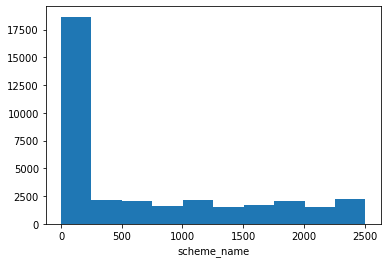

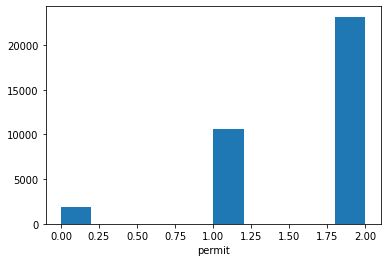

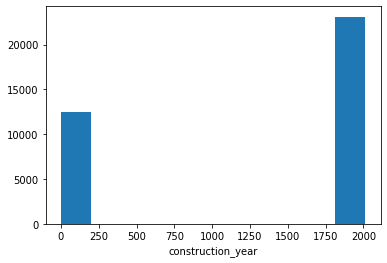

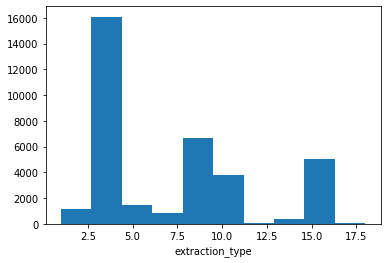

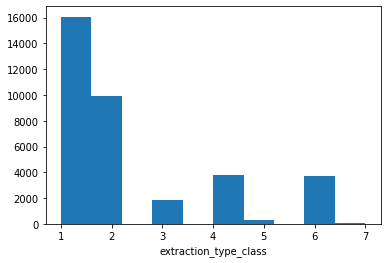

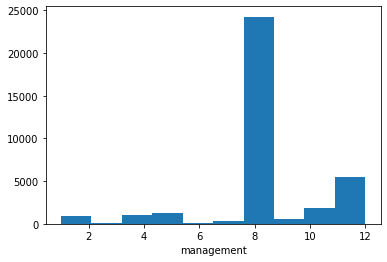

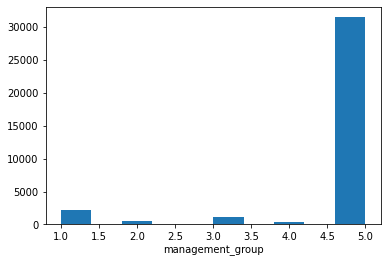

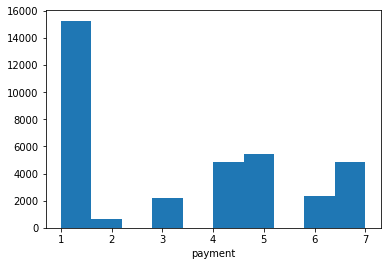

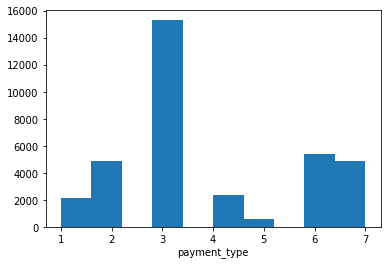

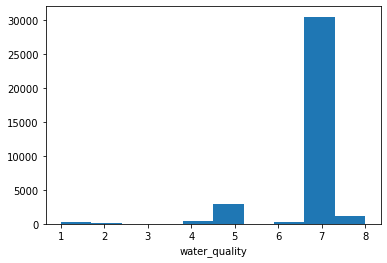

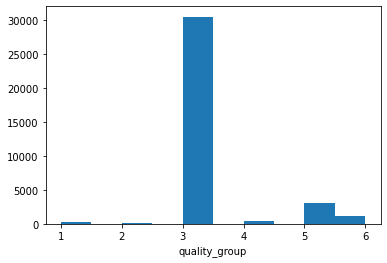

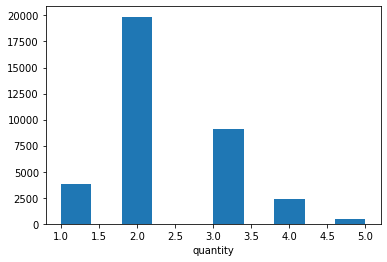

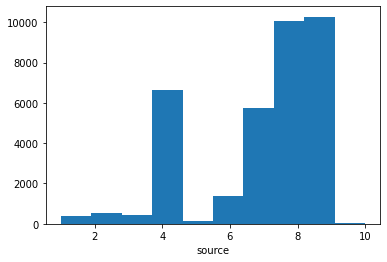

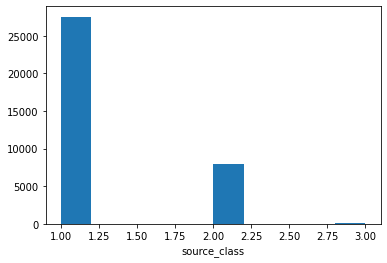

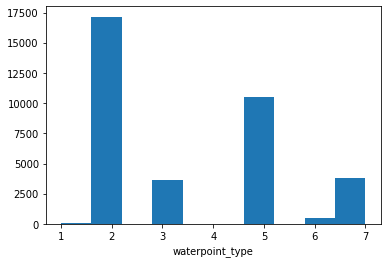

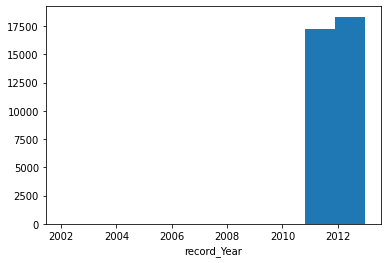

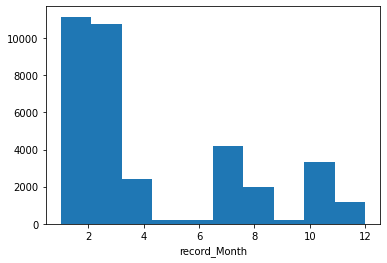

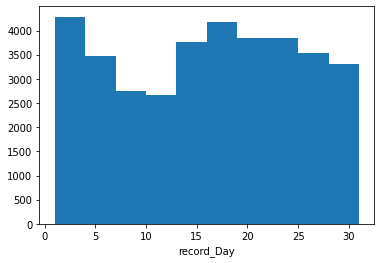

In [56]:
# Plot the histogram of the features.

for col in X_train.columns.values:
    plt.hist(X_train[col])
    plt.xlabel(col)
    plt.show()

#### Observation: All the variables are spread well except 'num_private' , 'amount_tsh', 'population'. Hence, we drop these features.
#### Next: We have a look at the corrtelation matrix

In [57]:
import seaborn as sns

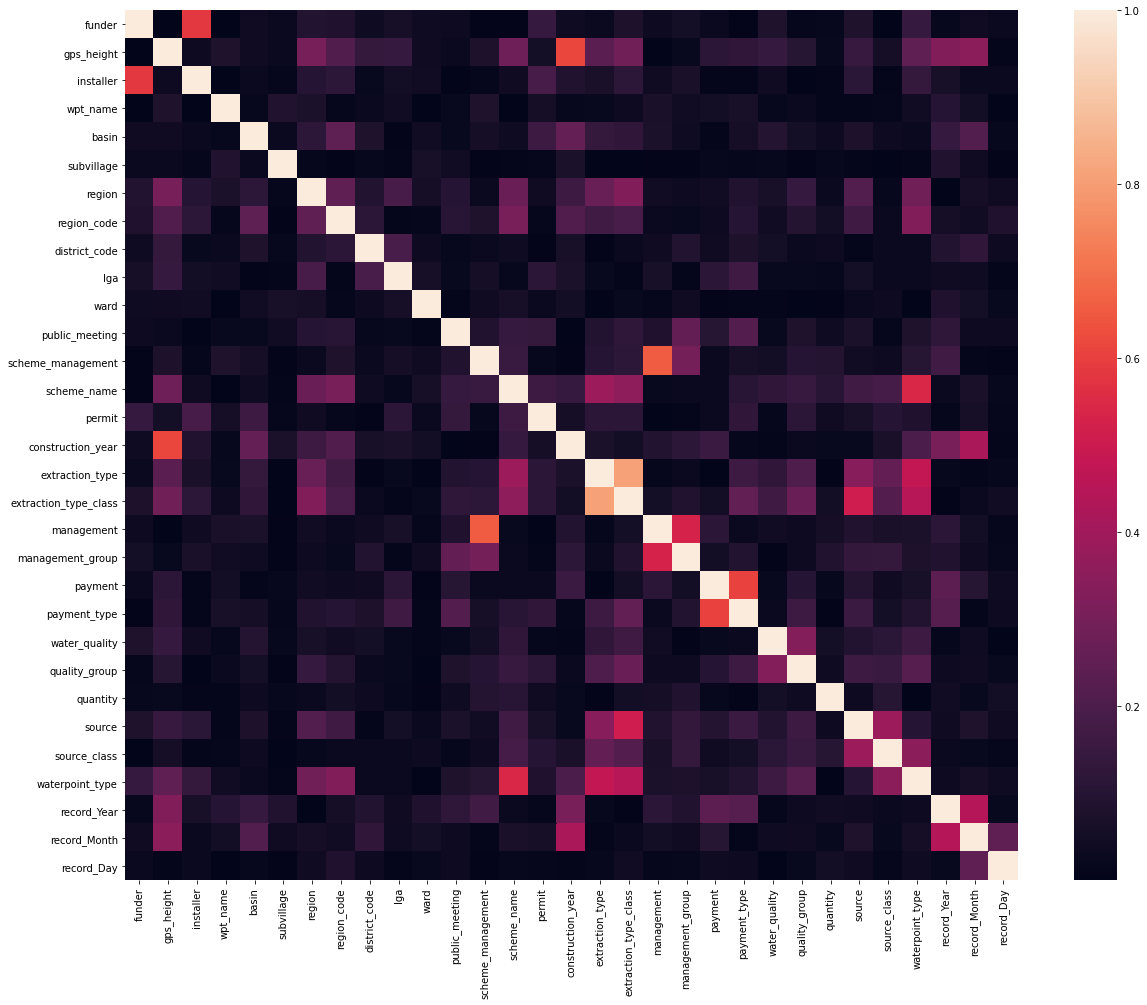

In [58]:
corrMatrix =X_train.corr(method = "spearman")
fig , ax = plt.subplots(figsize = (20,16))
sns.heatmap(abs(corrMatrix) , annot= False) # Show absolute value
plt.show()

In [59]:
X_train.nunique()

funder                    1459
gps_height                2364
installer                 1669
wpt_name                 23722
basin                        9
subvillage               14779
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2066
public_meeting               3
scheme_management           13
scheme_name               2349
permit                       3
construction_year           55
extraction_type             18
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
source                      10
source_class                 3
waterpoint_type              7
record_Year                  5
record_Month                12
record_Day                  31
dtype: int64

## Training Models

### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[2,5,10,15,20], 'n_estimators':[10,30,50,100]}
clfrfc = GridSearchCV(estimator=rfc, param_grid=hyperparameters)
clfrfc.fit(X_train, y_train)

print("Best parameter choices are " + str(clfrfc.best_params_))
print("Best accuracy score is " +str(clfrfc.best_score_))

y_pred = clfrfc.predict(X_test)

print(classification_report(y_test, y_pred))

Best parameter choices are {'max_depth': 20, 'n_estimators': 100}
Best accuracy score is 0.7963804713804714
              precision    recall  f1-score   support

           1       0.79      0.90      0.84      4833
           2       0.56      0.28      0.37       654
           3       0.85      0.76      0.80      3423

    accuracy                           0.80      8910
   macro avg       0.73      0.65      0.67      8910
weighted avg       0.79      0.80      0.79      8910



In [61]:
rfc = RandomForestClassifier(max_depth= clfrfc.best_params_['max_depth'], n_estimators= clfrfc.best_params_['n_estimators'])
rfc.fit(X_train , y_train)

importance = rfc.feature_importances_

In [62]:
i = 0
for col in X_train.columns.values:
    print("Score of the feature {} is {}".format(col,importance[i]))
    i = i+1
average = np.mean(importance[3:12])

Score of the feature funder is 0.03908811347707627
Score of the feature gps_height is 0.060799701850788486
Score of the feature installer is 0.03263524773141236
Score of the feature wpt_name is 0.06909837979217795
Score of the feature basin is 0.01716645422113684
Score of the feature subvillage is 0.06440886148310478
Score of the feature region is 0.020839941218544558
Score of the feature region_code is 0.020063056939614125
Score of the feature district_code is 0.020799076590862824
Score of the feature lga is 0.031154127317655263
Score of the feature ward is 0.043841072481260006
Score of the feature public_meeting is 0.008333182491370326
Score of the feature scheme_management is 0.015404424104364418
Score of the feature scheme_name is 0.02985260049449422
Score of the feature permit is 0.008590820167632258
Score of the feature construction_year is 0.05168000691854861
Score of the feature extraction_type is 0.03337797657947764
Score of the feature extraction_type_class is 0.0309756305672

We can see that these features have very less importance: 'public_meeting','permit','management_group','quality_group','source_class','record_Year'

In [63]:
cols_to_drop = ['public_meeting','permit','management_group','quality_group','source_class','record_Year']
X_train.drop(cols_to_drop , axis = 1 , inplace=True)
X_test.drop(cols_to_drop , axis = 1 , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[2,5,10,15,20], 'n_estimators':[10,30,50,100]}
clfrfc = GridSearchCV(estimator=rfc, param_grid=hyperparameters)
clfrfc.fit(X_train, y_train)

print("Best parameter choices are " + str(clfrfc.best_params_))
print("Best accuracy score is " +str(clfrfc.best_score_))

y_pred = clfrfc.predict(X_test)

print(classification_report(y_test, y_pred))

Best parameter choices are {'max_depth': 20, 'n_estimators': 100}
Best accuracy score is 0.7938832772166105
              precision    recall  f1-score   support

           1       0.79      0.90      0.84      4833
           2       0.56      0.29      0.38       654
           3       0.84      0.76      0.80      3423

    accuracy                           0.80      8910
   macro avg       0.73      0.65      0.67      8910
weighted avg       0.79      0.80      0.79      8910



##### Feature elimination is not that beneficial in this case

## Neural Networks

Steps followed are as follows
* Some data transformation is required first
* Target column has to be encoded differently
* Data has to be normalized for better comparison of weights

In [65]:
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

nn = MLPClassifier(solver='lbfgs', max_iter=300)
hyperparameters = {'alpha':[1e-5, 1e-4], 'hidden_layer_sizes':[(10),(10,20),(20,10)]}
clfnn = GridSearchCV(estimator=nn, param_grid=hyperparameters)
clfnn.fit(x_train, y_train)

print("Best parameter choices are " + str(clfnn.best_params_))
print("Best accuracy score is " + str(clfnn.best_score_))

y_pred = clfnn.predict(x_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

Best parameter choices are {'alpha': 0.0001, 'hidden_layer_sizes': (20, 10)}
Best accuracy score is 0.7434624017957352
              precision    recall  f1-score   support

           1       0.73      0.89      0.80      4835
           2       0.52      0.13      0.21       636
           3       0.79      0.66      0.72      3439

    accuracy                           0.75      8910
   macro avg       0.68      0.56      0.58      8910
weighted avg       0.74      0.75      0.73      8910



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


We had got a higher accuracy with Random Forest. Hence, we don't go ahead with Neural Networks.

## **K Nearest Neighbours**

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
hyperparameters = {'n_neighbors':[3,5,7], 'weights':['uniform','distance']}
clfknn = GridSearchCV(estimator=knn, param_grid=hyperparameters)
clfknn.fit(x_train, y_train)

print("Best parameter choices are " + str(clfknn.best_params_))
print("Best accuracy score is " +str(clfknn.best_score_))

y_pred = clfknn.predict(x_test)

print(classification_report(y_test, y_pred))

Best parameter choices are {'n_neighbors': 7, 'weights': 'distance'}
Best accuracy score is 0.7400112233445568
              precision    recall  f1-score   support

           1       0.75      0.84      0.79      4767
           2       0.47      0.31      0.37       668
           3       0.76      0.70      0.73      3475

    accuracy                           0.74      8910
   macro avg       0.66      0.62      0.63      8910
weighted avg       0.74      0.74      0.74      8910



Even here the score is lower than that obtained by Random Forest Classifier. Hence, we continue with Random Forest Classifier.

## Visualsing the Decision Boundary

We will consider the features 'quantity' and 'subvillage' for this purpose

Reference: https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, ensemble

n_estimators = clfrfc.best_params_['n_estimators']
max_depth = clfrfc.best_params_['max_depth']

X = df_tmp[['quantity','subvillage']] 
y = df_tmp['status_group']

h = .02 

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

clfvis = ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
clfvis.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X['quantity'].min() - 1, X['quantity'].max() + 1
y_min, y_max = X['subvillage'].min() - 1, X['subvillage'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clfvis.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X['longitude'], X['age'], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### Final Output

We use Random Forest Classifier for making predictions on df_test

In [ ]:
rfc = RandomForestClassifier(n_estimators=clfrfc.best_params_['n_estimators'], max_depth = clfrfc.best_params_['max_depth'])
rfc.fit(df_tmp.drop(columns=['status_group']), df_tmp['status_group'])

y_final = rfc.predict(df_test)
y_test=[]

for i in range(0,len(y_final)):
  if y_final[i]==0:
    y_test.append('functional')
  elif y_final[i]==1:
    y_test.append('non functional')
  else:
    y_test.append('functional needs repair')


In [ ]:
dict = {'labels': y_test}  
       
df = pd.DataFrame(dict) 
df.to_csv('y_test.csv', header=None, index=False)